# 双方向入力
$f(a, x)=ax(1-x)
$

$
\begin{pmatrix}
{x_{t+1}}\\
{y_{t+1}}
\end{pmatrix}
=
(1-\epsilon)
\begin{pmatrix}
{f(x_{t})}\\
{f(y_{t})}
\end{pmatrix}
+
\epsilon
\begin{pmatrix}
{f(y_{t})}\\
{f(x_{t})}
\end{pmatrix}
$

## 分岐図

断りがない限り, 分岐図はパラメータに関係なく初期値が実行ごとに固定.

p_shape = (4000,)
x_shape = (4000, 200)


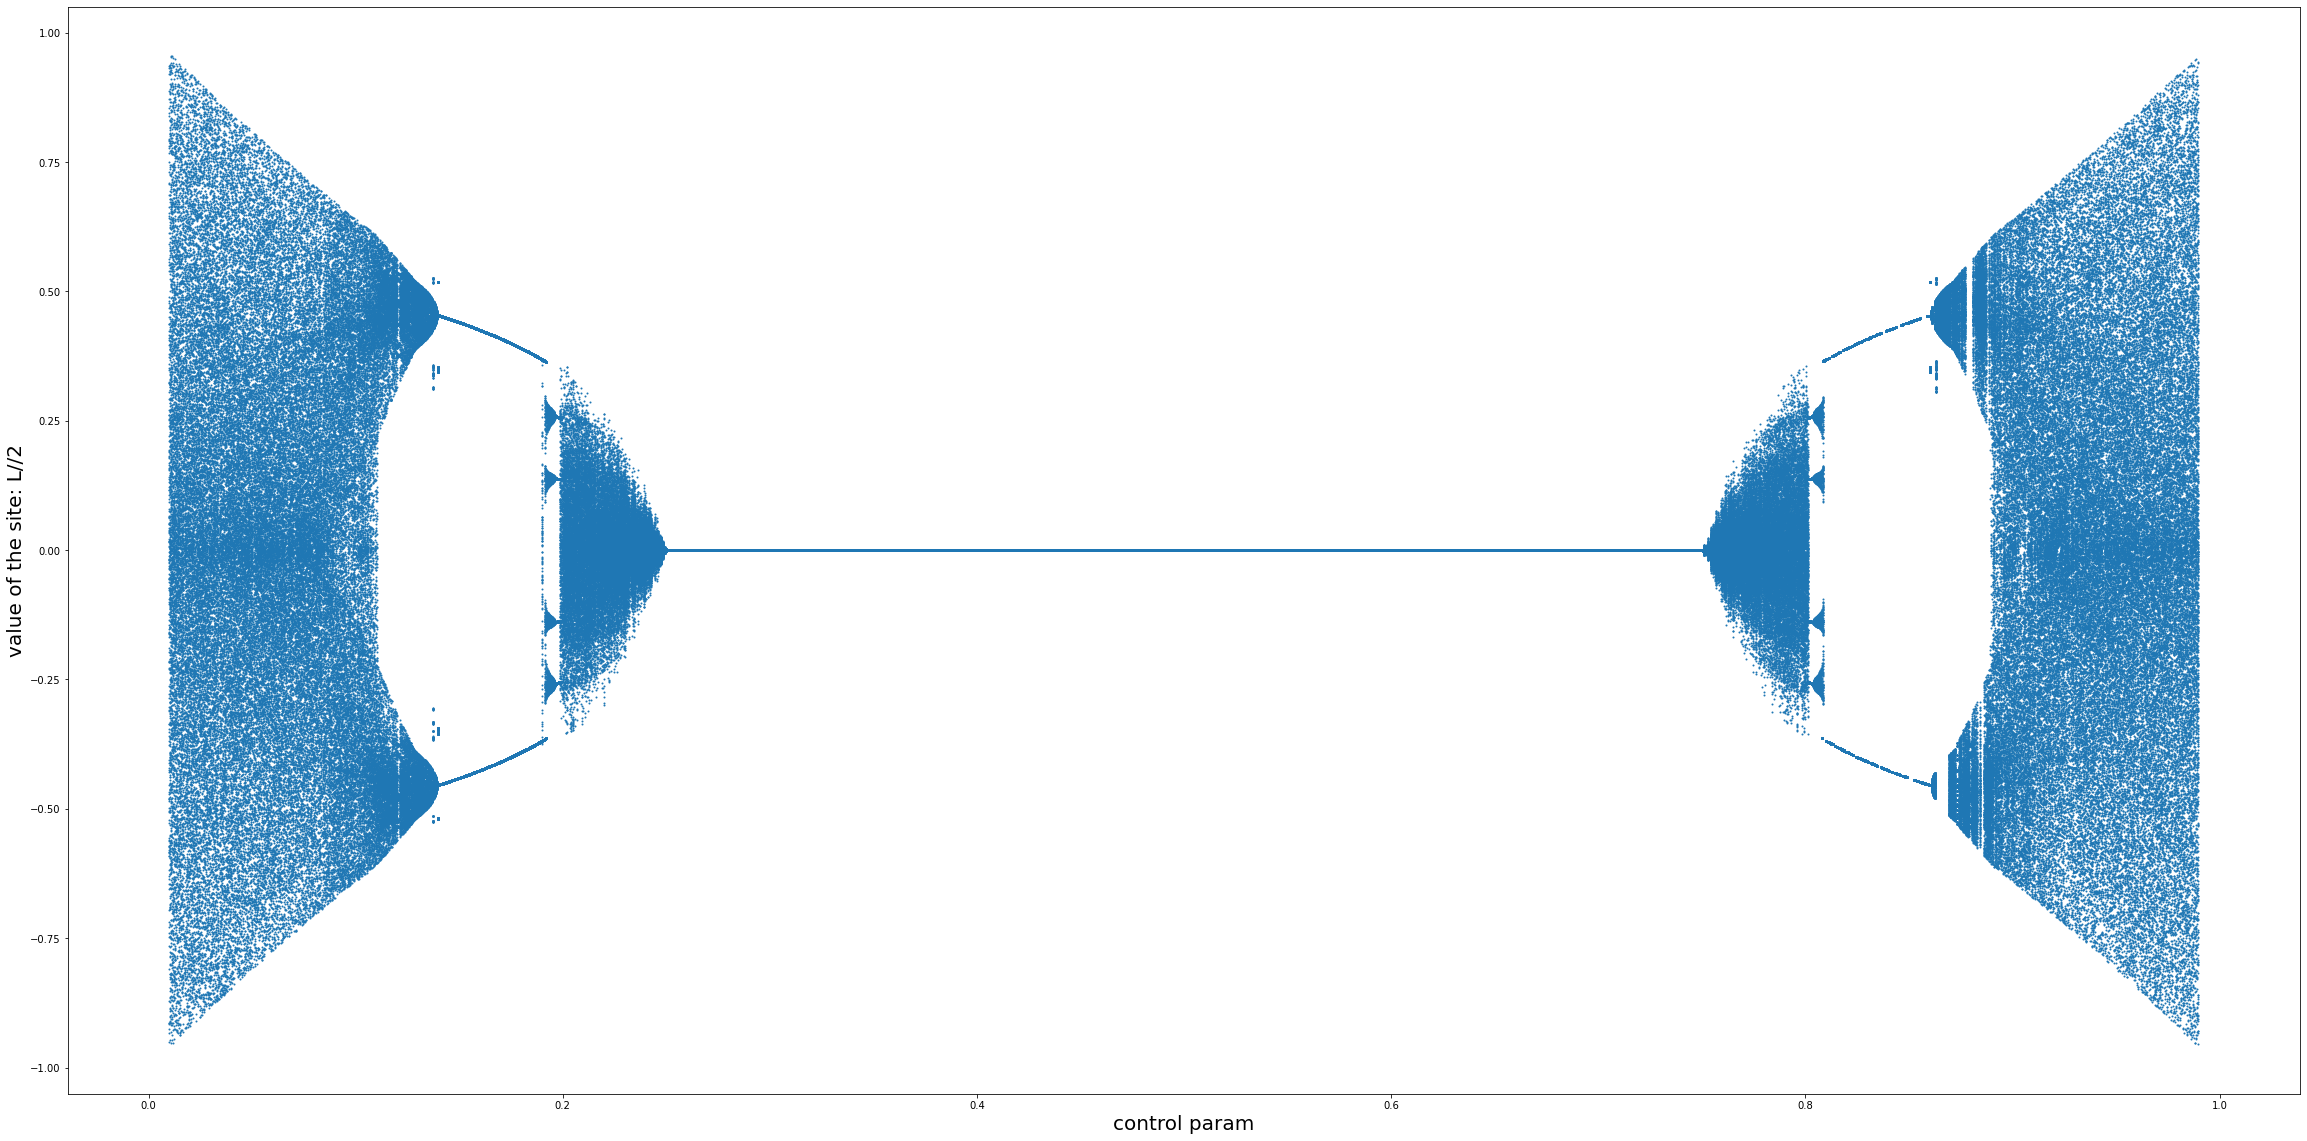

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

L = 2      # no. of lattice sites

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 4000   # The iterates we'll throw away
nIterates=200
nSteps = 4000       # This sets how dense the bifurcation diagram will be

pLow = 0.01
pHigh = 0.99
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

"""
端を0の固定端とする。
左右対称じゃないのは初期値が原因.

np.newaxisの正確な説明:
https://qiita.com/tomoshi0809/items/a5ed38ad8db030650e7f

"""
def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i+1])
        elif i == L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + 0.5 * p * (f(p,x[i-1]) + f(4,x[i+1]))
            #ここの0.5は必要か??
    return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(func1, L, states)

x = np.empty((p.size, nIterates))
for i in range(nIterates):
  states=next_x(func1, L,  states)
  x[:,i]=states[1]-states[0]

plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("value of the site: L//2",fontsize=20)  

time=np.arange(nSteps)
#表示はできたけど　勝手に系列推測される,,,
#ax1.plot(p, x, linestyle = "solid")
ax1.scatter(np.tile(p[:,None], (1, nIterates)), x, s=1)
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


## frequency

p_shape = (20000,)
x_shape = (20000, 1000)


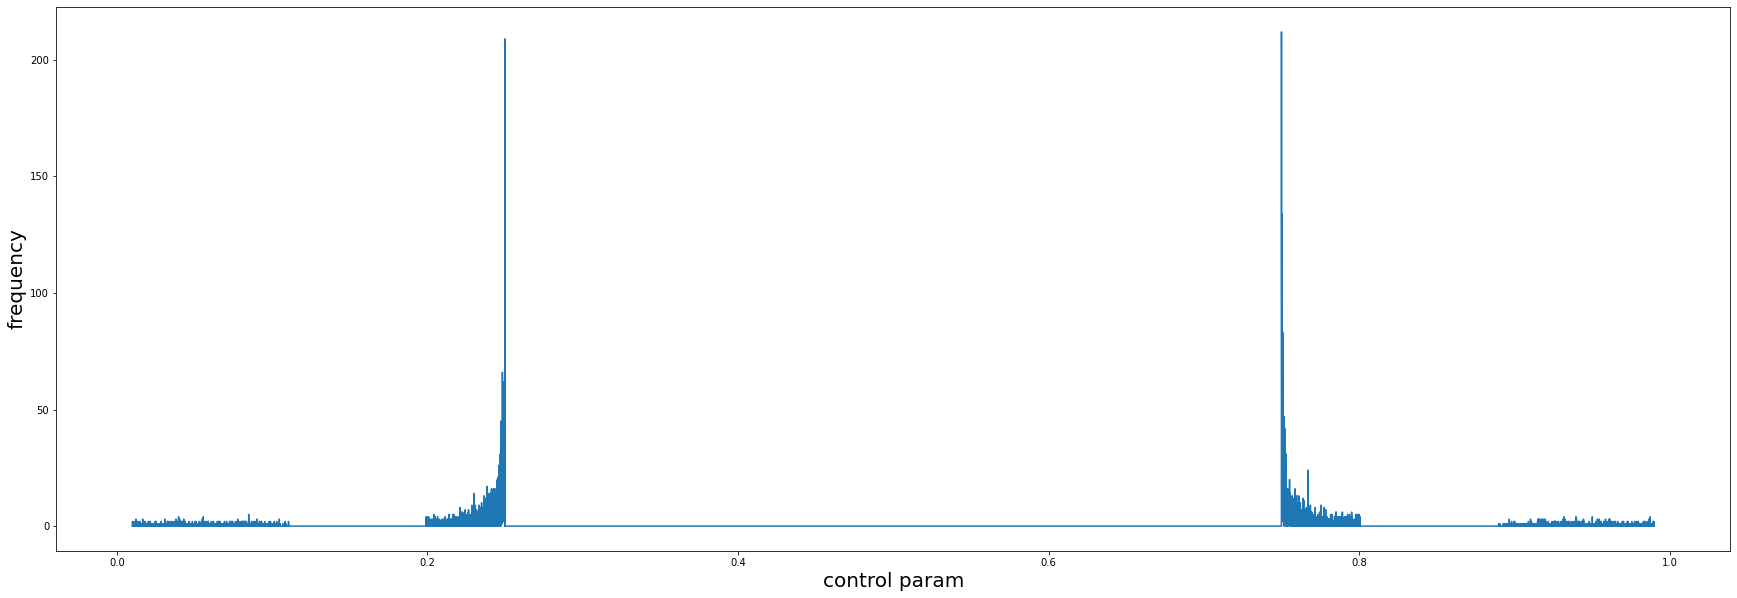

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

L = 2      # no. of lattice sites

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 10001   # The iterates we'll throw away
nIterates=1000
nSteps = 20000      # This sets how dense the bifurcation diagram will be

pLow = 0.01
pHigh = 0.99
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

"""
端を0の固定端とする。
左右対称じゃないのは初期値が原因.

np.newaxisの正確な説明:
https://qiita.com/tomoshi0809/items/a5ed38ad8db030650e7f

"""
def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i+1])
        elif i == L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + 0.5 * p * (f(p,x[i-1]) + f(4,x[i+1]))
            #ここの0.5は必要か??
    return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(func1, L, states)


delta=0.0001
x = np.empty((p.size, nIterates))
for j in range(p.size):
    x[j,0]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0

count=np.zeros((p.size,1))
for i in range(1, nIterates):
  states=next_x(func1, L,  states)
  for j in range(p.size):
    x[j,i]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0
    count[j, 0]+=1 if x[j, i]!=x[j, i-1] else 0

count=count.reshape(p.size)//2
"""
count=np.zeros((p.size,1))
for i in range(nIterates-1):
  for j in range(p.size):
    count[j, 0]+=1 if x[j, i+1]!=x[j, i] else 0
"""

plt.rcParams["figure.figsize"] = (30, 10)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("frequency",fontsize=20)  

ax1.plot(p, count, linestyle = "solid")
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


## freqency 拡大図

p_shape = (2000,)
x_shape = (2000, 1000)


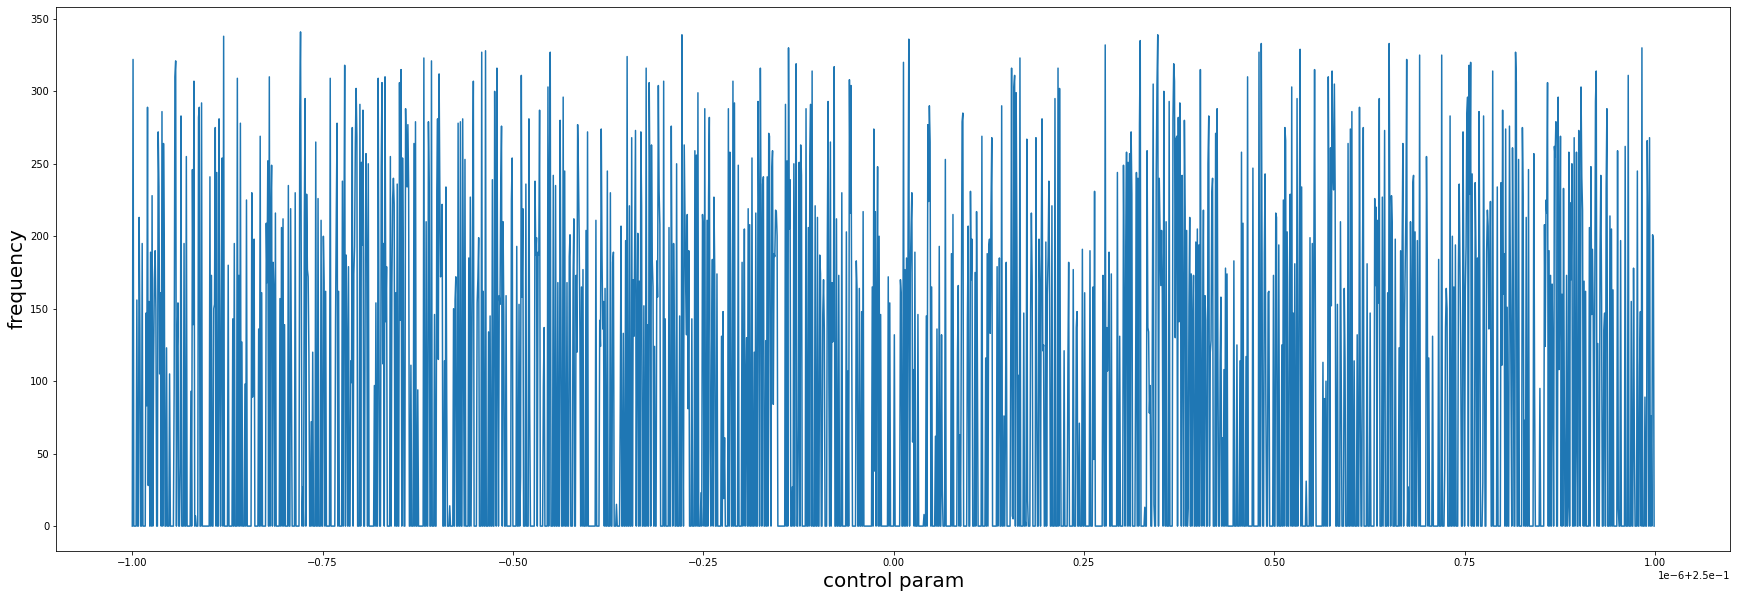

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

L = 2      # no. of lattice sites

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 10001   # The iterates we'll throw away
nIterates=1000
nSteps = 2000      # This sets how dense the bifurcation diagram will be

pLow = 0.249999
pHigh = 0.250001
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

"""
端を0の固定端とする。
左右対称じゃないのは初期値が原因.

np.newaxisの正確な説明:
https://qiita.com/tomoshi0809/items/a5ed38ad8db030650e7f

"""
def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i+1])
        elif i == L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + 0.5 * p * (f(p,x[i-1]) + f(4,x[i+1]))
            #ここの0.5は必要か??
    return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(func1, L, states)


delta=0.0001
x = np.empty((p.size, nIterates))
for j in range(p.size):
    x[j,0]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0

count=np.zeros((p.size,1))
for i in range(1, nIterates):
  states=next_x(func1, L,  states)
  for j in range(p.size):
    x[j,i]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0
    count[j, 0]+=1 if x[j, i]!=x[j, i-1] else 0

count=count.reshape(p.size)//2
"""
count=np.zeros((p.size,1))
for i in range(nIterates-1):
  for j in range(p.size):
    count[j, 0]+=1 if x[j, i+1]!=x[j, i] else 0
"""

plt.rcParams["figure.figsize"] = (30, 10)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("frequency",fontsize=20)  

ax1.plot(p, count, linestyle = "solid")
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


In [ ]:
#ascending order 昇順
#descending order 降順
as_ord=sorted(count, reverse=True)

count_list=count.tolist()#破壊的な操作をすると事前に実行したプログラムと食い違う.
for i in range(100):
  a=as_ord[i]
  print(count_list.index(a)," ", end="")

221  722  722  120  1020  1324  1483  1483  1278  862  862  1534  464  459  459  459  459  1691  1691  650  383  383  1  1  57  57  1013  1013  872  872  279  279  922  479  479  479  479  479  353  353  353  893  893  893  893  403  511  511  511  56  56  56  56  56  138  138  138  942  81  81  81  81  81  328  328  328  328  328  1341  1341  691  691  691  546  546  546  546  294  294  476  476  743  743  566  566  566  227  227  227  227  822  822  822  822  91  91  91  299  299  299  

In [ ]:
print(p[299])

0.24999929899999984


## Intermittencyを示す,二つの状態値とそれらの差のプロット

差(x-y)のfrequencyが一番高い箇所:

intemittencyはみられない。

値が0に収束していく過程の構造が見られる.

1. 増幅してある箇所で急に振幅が小さくなる. 2. 同じような振幅が続き急に振幅が小さくなることを繰り返す.




(20000, 2)


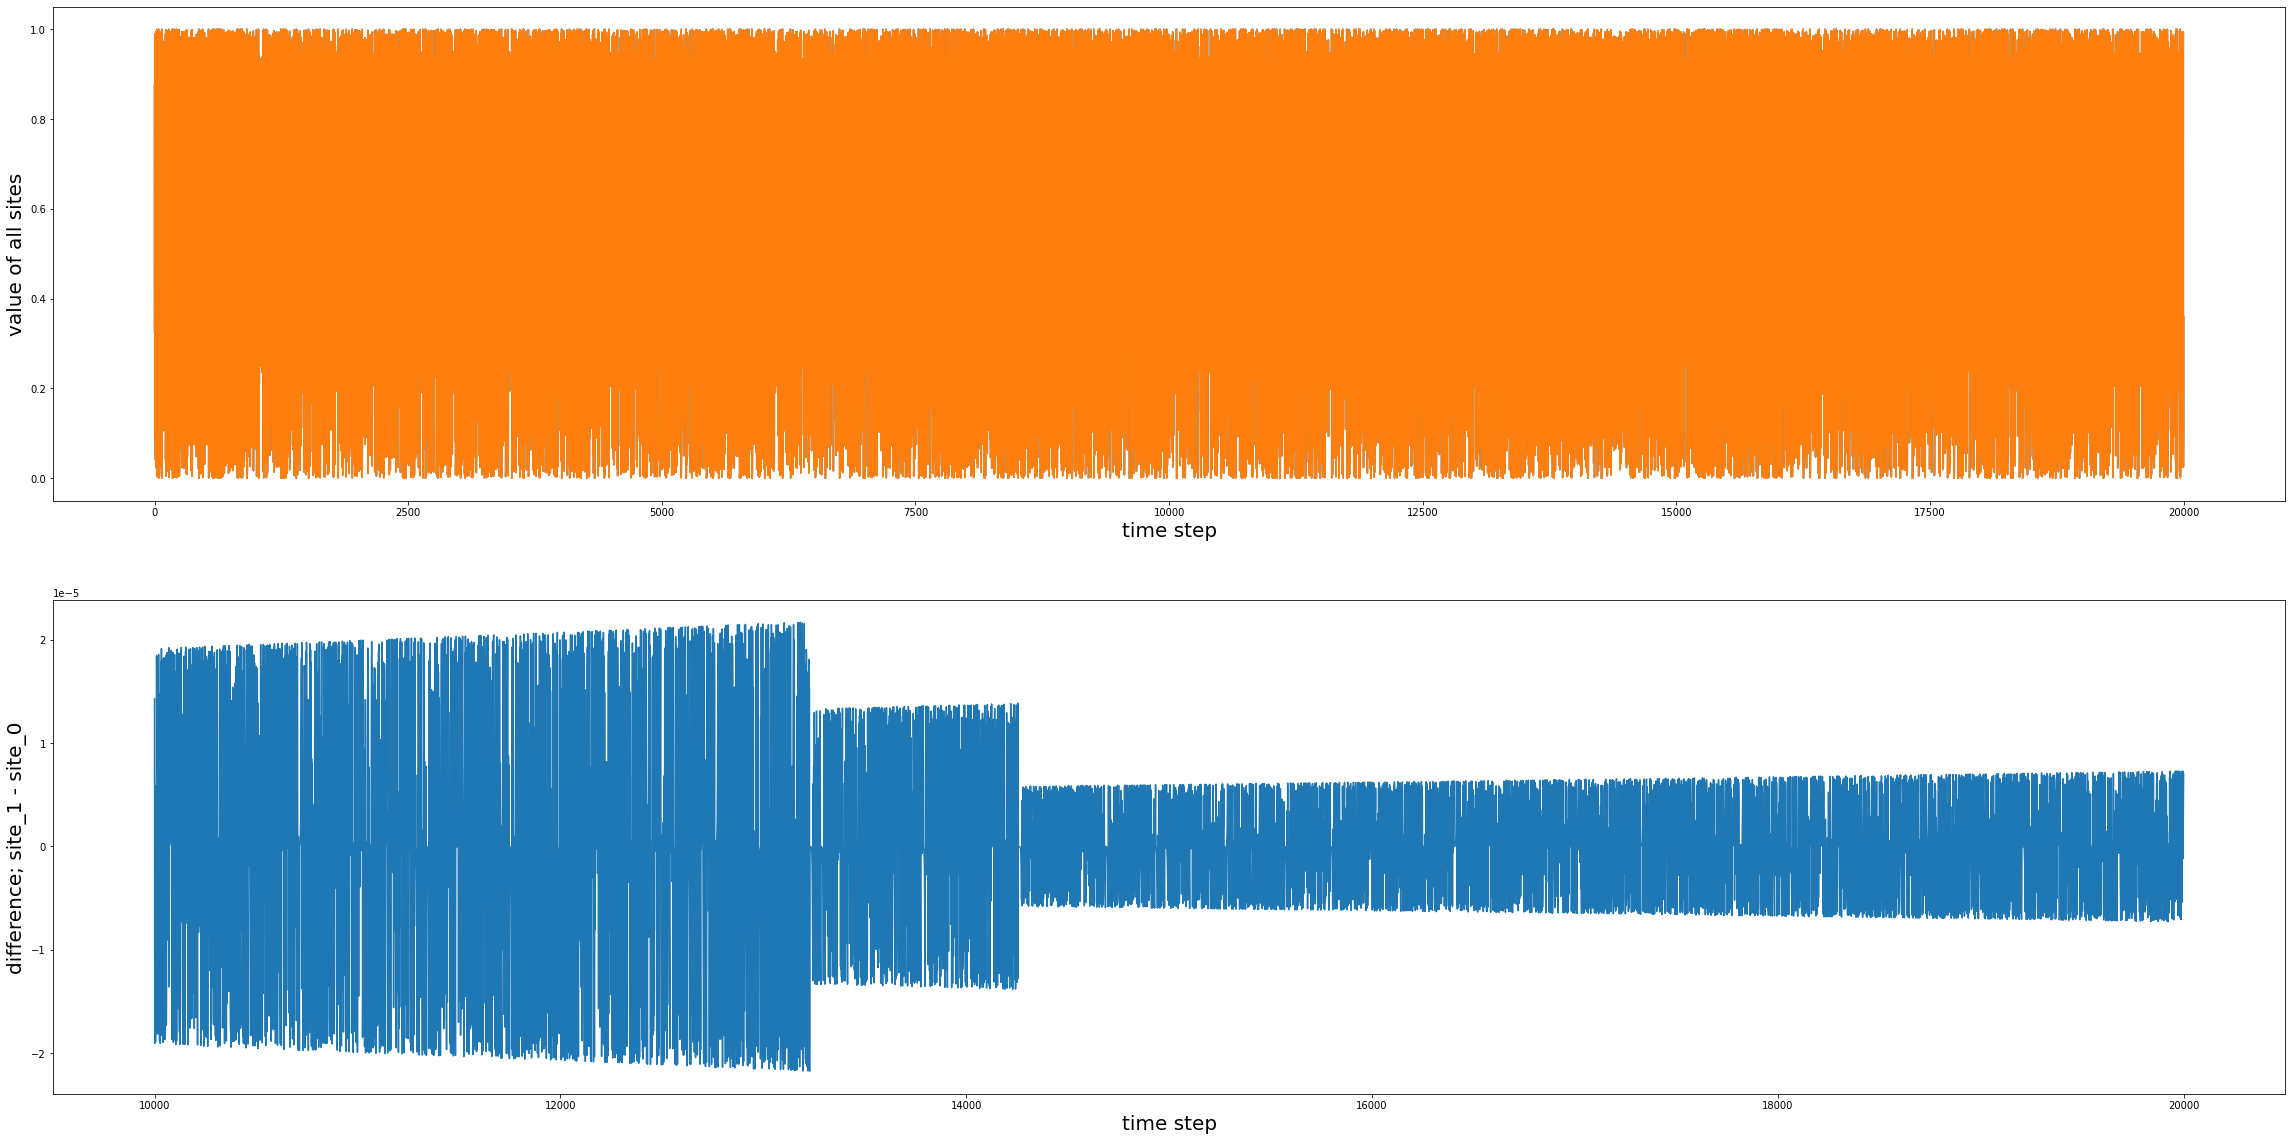

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt


L = 2      # no. of lattice sites
eps = 0.24999  # diffusive coupling strength: 
r = 4   # control parameter r:

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 200   # The iterates we'll throw away
nSteps = 20000       # The iterates we use

def logistic(r, x):
  return r*x*(1-x)

def func1(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i+1])
        elif i == L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + 0.5 * eps * (f(r,x[i-1]) + f(r,x[i+1]))
    return x_new

#縦 site, 横 time(step)
states = np.empty((nSteps, L))

for i in range(nTransients):
  ic=next_x(logistic, L, ic)

states[0]=ic
for i in range(nSteps-1):
  states[i+1]=next_x(logistic, L, states[i])

print(states.shape)
plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(2,1)
ax1[0].set_xlabel("time step",fontsize=20)
ax1[0].set_ylabel("value of all sites",fontsize=20)  

time=np.arange(nSteps)
ax1[0].plot(time, states)

plot_length=10000
ax1[1].set_xlabel("time step",fontsize=20)
ax1[1].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[1].plot(time[-plot_length:], (states[-plot_length:,1]-states[-plot_length:,0]))

plt.show()

## intemittency


(20000, 2)


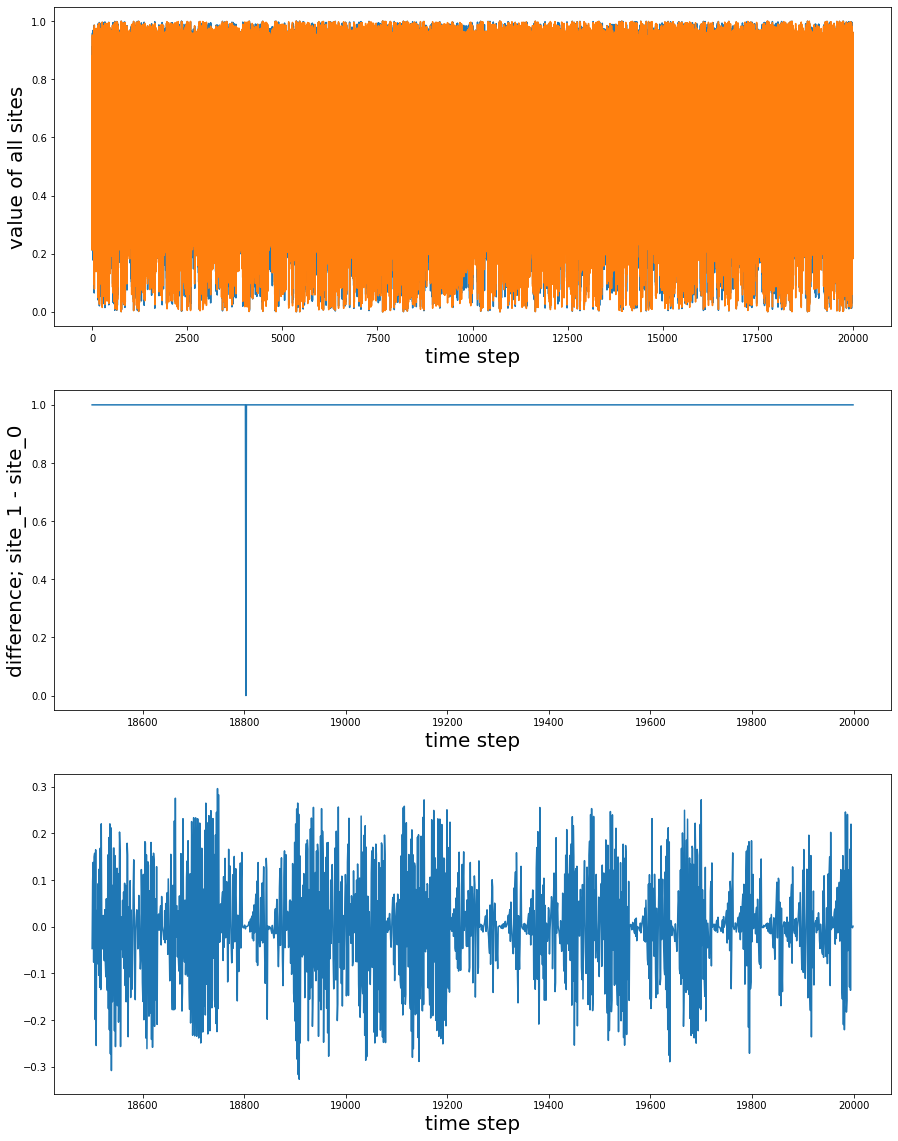

In [6]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt


L = 2      # no. of lattice sites
eps = 0.21  # diffusive coupling strength: 
r = 4   # control parameter r:

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 200   # The iterates we'll throw away
nSteps = 20000       # The iterates we use

def logistic(r, x):
  return r*x*(1-x)

def func1(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i+1])
        elif i == L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + 0.5 * eps * (f(r,x[i-1]) + f(r,x[i+1]))
    return x_new

#縦 site, 横 time(step)
states = np.empty((nSteps, L))

for i in range(nTransients):
  ic=next_x(logistic, L, ic)

states[0]=ic
for i in range(nSteps-1):
  states[i+1]=next_x(logistic, L, states[i])

print(states.shape)
plt.rcParams["figure.figsize"] = (15, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(3,1)
ax1[0].set_xlabel("time step",fontsize=20)
ax1[0].set_ylabel("value of all sites",fontsize=20)  

time=np.arange(nSteps)
ax1[0].plot(time, states)

plot_length=1500
ax1[1].set_xlabel("time step",fontsize=20)
ax1[1].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[1].plot(time[-plot_length:], (abs(states[-plot_length:,1]-states[-plot_length:,0])>1e-4))

ax1[2].set_xlabel("time step",fontsize=20)
#ax1[2].set_xticks(np.arange(18000, 20000, 2000))
#ax1[2].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[2].plot(time[-plot_length:], (states[-plot_length:,1]-states[-plot_length:,0]))
plt.show()

## パラメータ変更用

(20000, 2)


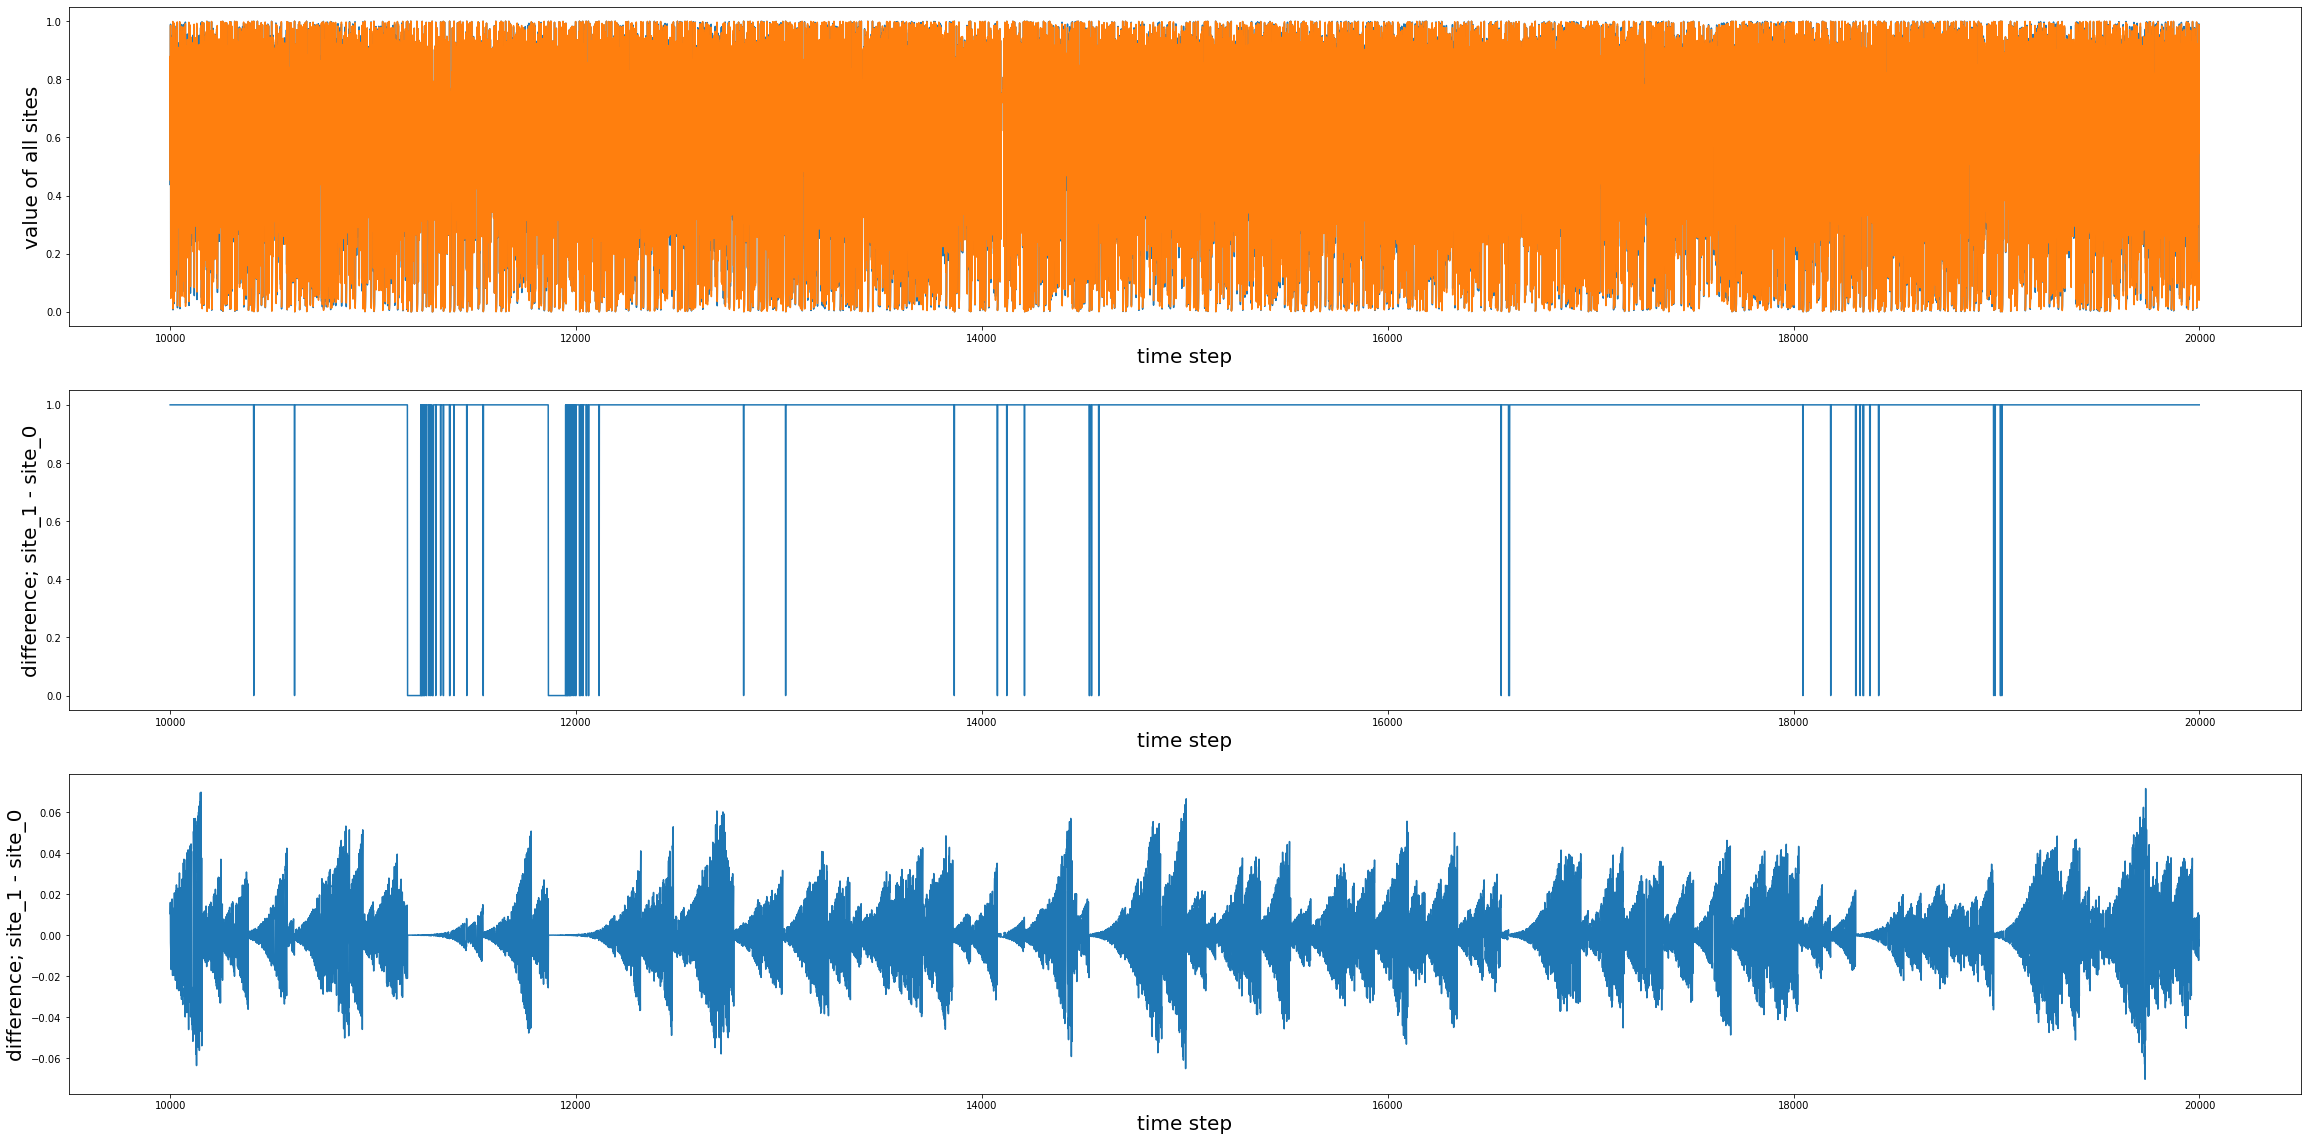

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt


L = 2      # no. of lattice sites
eps = 0.755  # diffusive coupling strength: 
r = 4   # control parameter r:

np.random.seed(1111)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 200   # The iterates we'll throw away
nSteps = 20000       # The iterates we use

def logistic(r, x):
  return r*x*(1-x)

def func1(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i+1])
        elif i == L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + 0.5 * eps * (f(r,x[i-1]) + f(r,x[i+1]))
    return x_new

#縦 site, 横 time(step)
states = np.empty((nSteps, L))

for i in range(nTransients):
  ic=next_x(logistic, L, ic)

states[0]=ic
for i in range(nSteps-1):
  states[i+1]=next_x(logistic, L, states[i])

print(states.shape)
plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(3,1)
plot_length=10000
ax1[0].set_xlabel("time step",fontsize=20)
ax1[0].set_ylabel("value of all sites",fontsize=20)  

time=np.arange(nSteps)
ax1[0].plot(time[-plot_length:], states[-plot_length:])

ax1[1].set_xlabel("time step",fontsize=20)
ax1[1].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[1].plot(time[-plot_length:], (abs(states[-plot_length:,1]-states[-plot_length:,0])>1e-4))

ax1[2].set_xlabel("time step",fontsize=20)
ax1[2].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[2].plot(time[-plot_length:], (states[-plot_length:,1]-states[-plot_length:,0]))
plt.show()

# 一方向入力 

$f(a, x)=ax(1-x)
$

$
\begin{pmatrix}
{x_{t+1}}\\
{y_{t+1}}
\end{pmatrix}
=
\begin{pmatrix}
{f(x_{t})}\\
{(1-\epsilon)f(y_{t})+\epsilon f(x_{t})}
\end{pmatrix}
$

## 分岐図

p_shape = (4000,)
x_shape = (4000, 200)


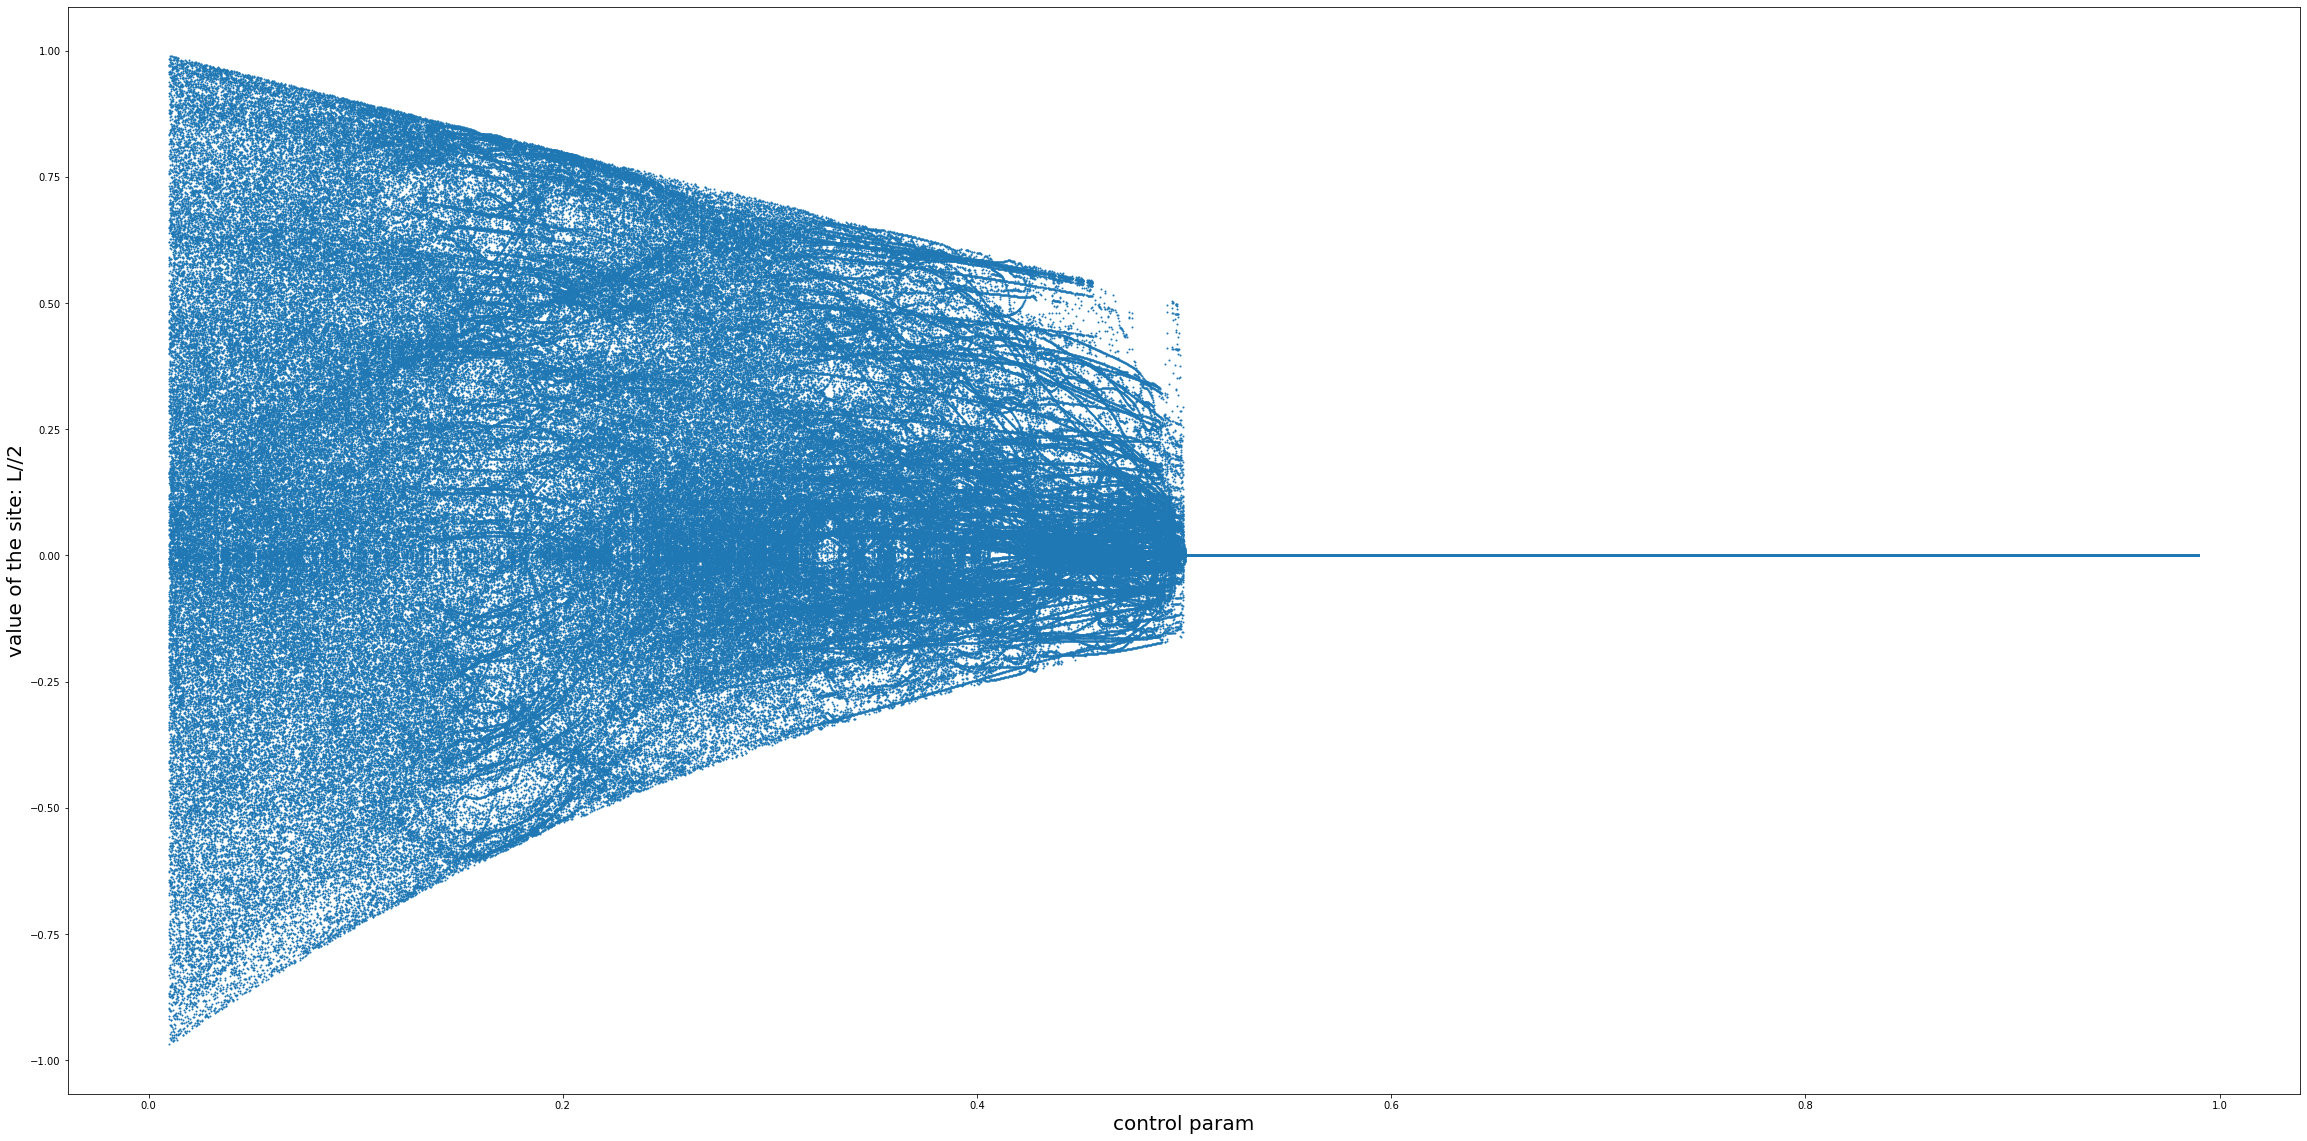

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

L = 2      # no. of lattice sites

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 4000   # The iterates we'll throw away
nIterates=200
nSteps = 4000       # This sets how dense the bifurcation diagram will be

pLow = 0.01
pHigh = 0.99
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

"""
端を0の固定端とする。
左右対称じゃないのは初期値が原因.

np.newaxisの正確な説明:
https://qiita.com/tomoshi0809/items/a5ed38ad8db030650e7f

"""
def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] =  f(4,x[i]) 
        elif i == L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + 0.5 * p * (f(p,x[i-1]) + f(4,x[i+1]))
            #ここの0.5は必要か??
    return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(func1, L, states)

x = np.empty((p.size, nIterates))
for i in range(nIterates):
  states=next_x(func1, L,  states)
  x[:,i]=states[1]-states[0]

plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("value of the site: L//2",fontsize=20)  

time=np.arange(nSteps)
#表示はできたけど　勝手に系列推測される,,,
#ax1.plot(p, x, linestyle = "solid")
ax1.scatter(np.tile(p[:,None], (1, nIterates)), x, s=1)
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


## frequency

p_shape = (20000,)
x_shape = (20000, 1000)


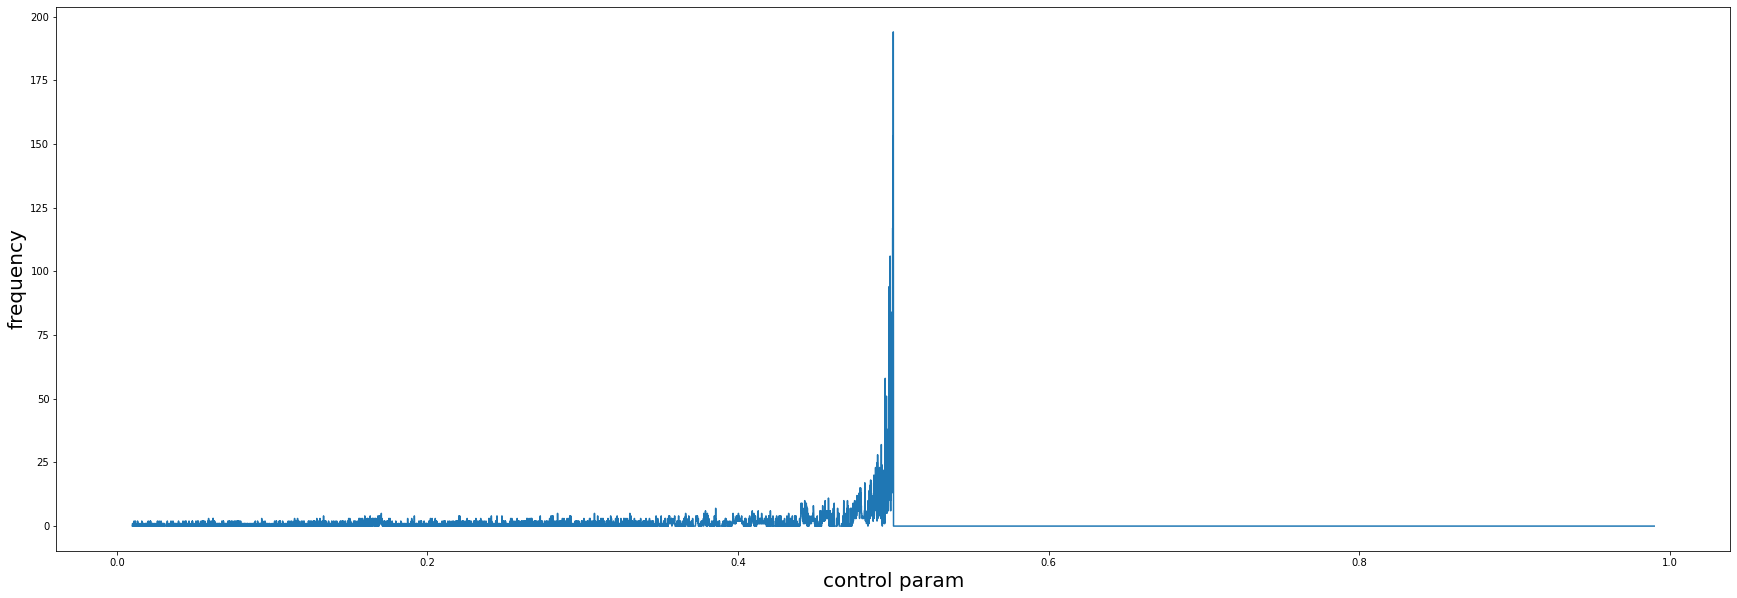

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

L = 2      # no. of lattice sites

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 10001   # The iterates we'll throw away
nIterates=1000
nSteps = 20000      # This sets how dense the bifurcation diagram will be

pLow = 0.01
pHigh = 0.99
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

"""
端を0の固定端とする。
左右対称じゃないのは初期値が原因.

np.newaxisの正確な説明:
https://qiita.com/tomoshi0809/items/a5ed38ad8db030650e7f

"""
def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = f(4,x[i])
        elif i == L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + 0.5 * p * (f(p,x[i-1]) + f(4,x[i+1]))
            #ここの0.5は必要か??
    return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(func1, L, states)


delta=0.0001
x = np.empty((p.size, nIterates))
for j in range(p.size):
    x[j,0]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0

count=np.zeros((p.size,1))
for i in range(1, nIterates):
  states=next_x(func1, L,  states)
  for j in range(p.size):
    x[j,i]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0
    count[j, 0]+=1 if x[j, i]!=x[j, i-1] else 0

count=count.reshape(p.size)//2
"""
count=np.zeros((p.size,1))
for i in range(nIterates-1):
  for j in range(p.size):
    count[j, 0]+=1 if x[j, i+1]!=x[j, i] else 0
"""

plt.rcParams["figure.figsize"] = (30, 10)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("frequency",fontsize=20)  

ax1.plot(p, count, linestyle = "solid")
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


## frequency 拡大

上記とはコードが違うが値の一致を確認済み.


p_shape = (2000,)
x_shape = (2000, 1000)


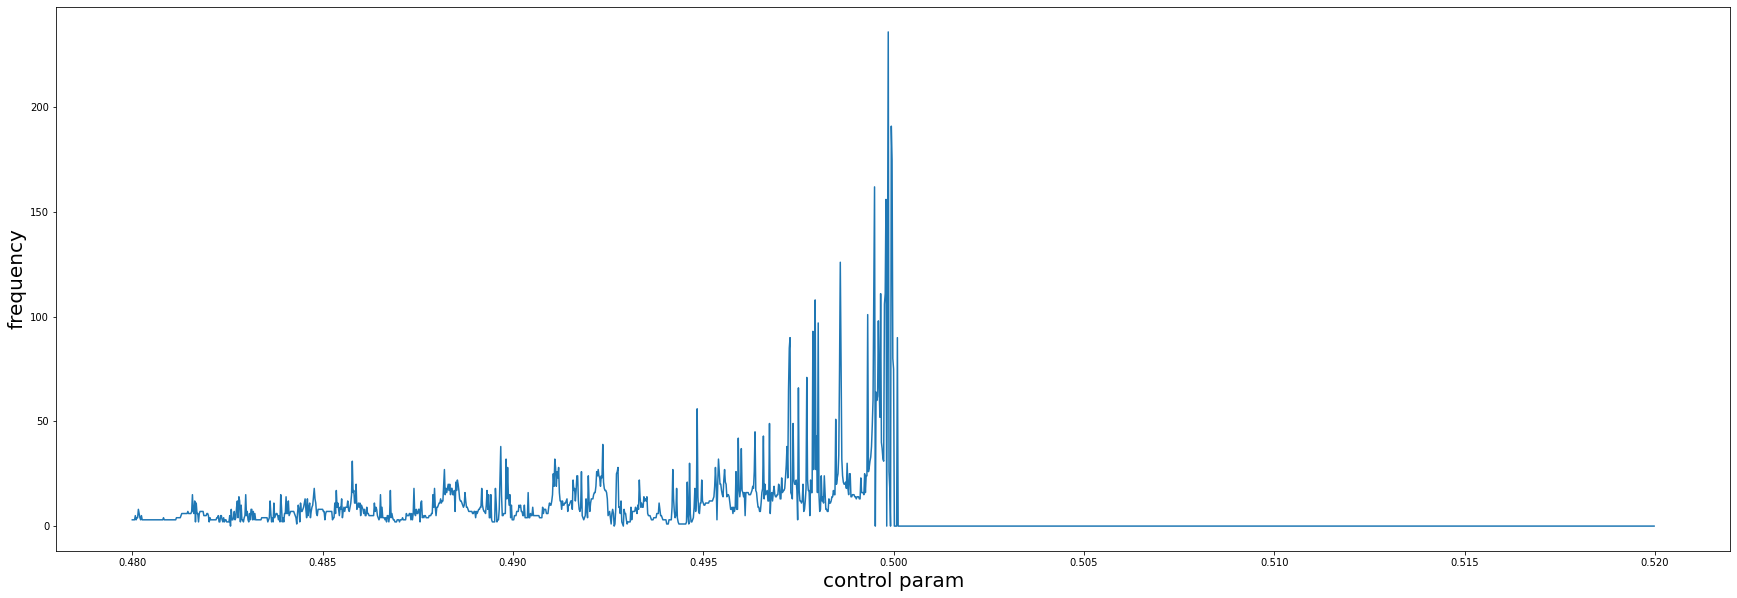

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

L = 2      # no. of lattice sites

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 10001   # The iterates we'll throw away
nIterates=1000
nSteps = 2000      # This sets how dense the bifurcation diagram will be

pLow = 0.48
pHigh = 0.52
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)


def logistic(r, x):
  return r*x*(1-x)

def next_x(f, x, r=4, L=2):
  x_new = np.empty(x.shape)
  x_new[0] = f(r,x[0])
  x_new[1] = (1 - p) * f(r,x[1]) + p*x_new[0]
  return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(logistic, states)

delta=0.0001
x = np.empty((p.size, nIterates))
for j in range(p.size):
    x[j,0]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0

count=np.zeros((p.size,1))
for i in range(1, nIterates):
  states=next_x(logistic, states)
  for j in range(p.size):
    x[j,i]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0
    count[j, 0]+=1 if x[j, i]!=x[j, i-1] else 0

count=count.reshape(p.size)//2
"""
count=np.zeros((p.size,1))
for i in range(nIterates-1):
  for j in range(p.size):
    count[j, 0]+=1 if x[j, i+1]!=x[j, i] else 0
"""

plt.rcParams["figure.figsize"] = (30, 10)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("frequency",fontsize=20)  

ax1.plot(p, count, linestyle = "solid")
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


## intemittency

(20000, 2)


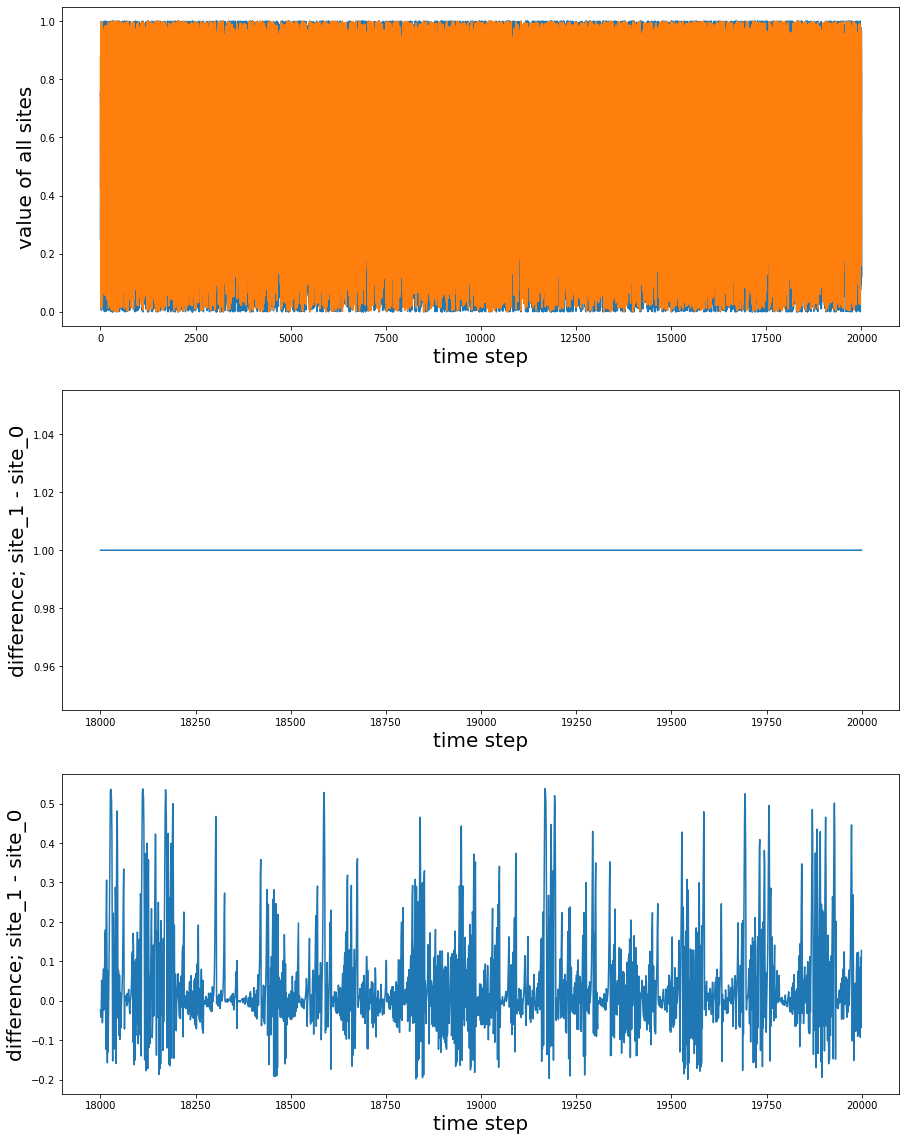

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt


L = 2      # no. of lattice sites
eps = 0.46  # diffusive coupling strength: 
r = 4   # control parameter r:

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 200   # The iterates we'll throw away
nSteps = 20000       # The iterates we use

def logistic(r, x):
  return r*x*(1-x)

def func1(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = f(r,x[i])
        elif i == L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + 0.5 * eps * (f(r,x[i-1]) + f(r,x[i+1]))
    return x_new

#縦 site, 横 time(step)
states = np.empty((nSteps, L))

for i in range(nTransients):
  ic=next_x(logistic, L, ic)

states[0]=ic
for i in range(nSteps-1):
  states[i+1]=next_x(logistic, L, states[i])

print(states.shape)
plt.rcParams["figure.figsize"] = (15, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(3,1)
ax1[0].set_xlabel("time step",fontsize=20)
ax1[0].set_ylabel("value of all sites",fontsize=20)  

time=np.arange(nSteps)
ax1[0].plot(time, states)

plot_length=2000
ax1[1].set_xlabel("time step",fontsize=20)
ax1[1].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[1].plot(time[-plot_length:], (abs(states[-plot_length:,1]-states[-plot_length:,0])>1e-4))

ax1[2].set_xlabel("time step",fontsize=20)
ax1[2].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[2].plot(time[-plot_length:], (states[-plot_length:,1]-states[-plot_length:,0]))
plt.show()

## パラメータ変更用

(20000, 2)


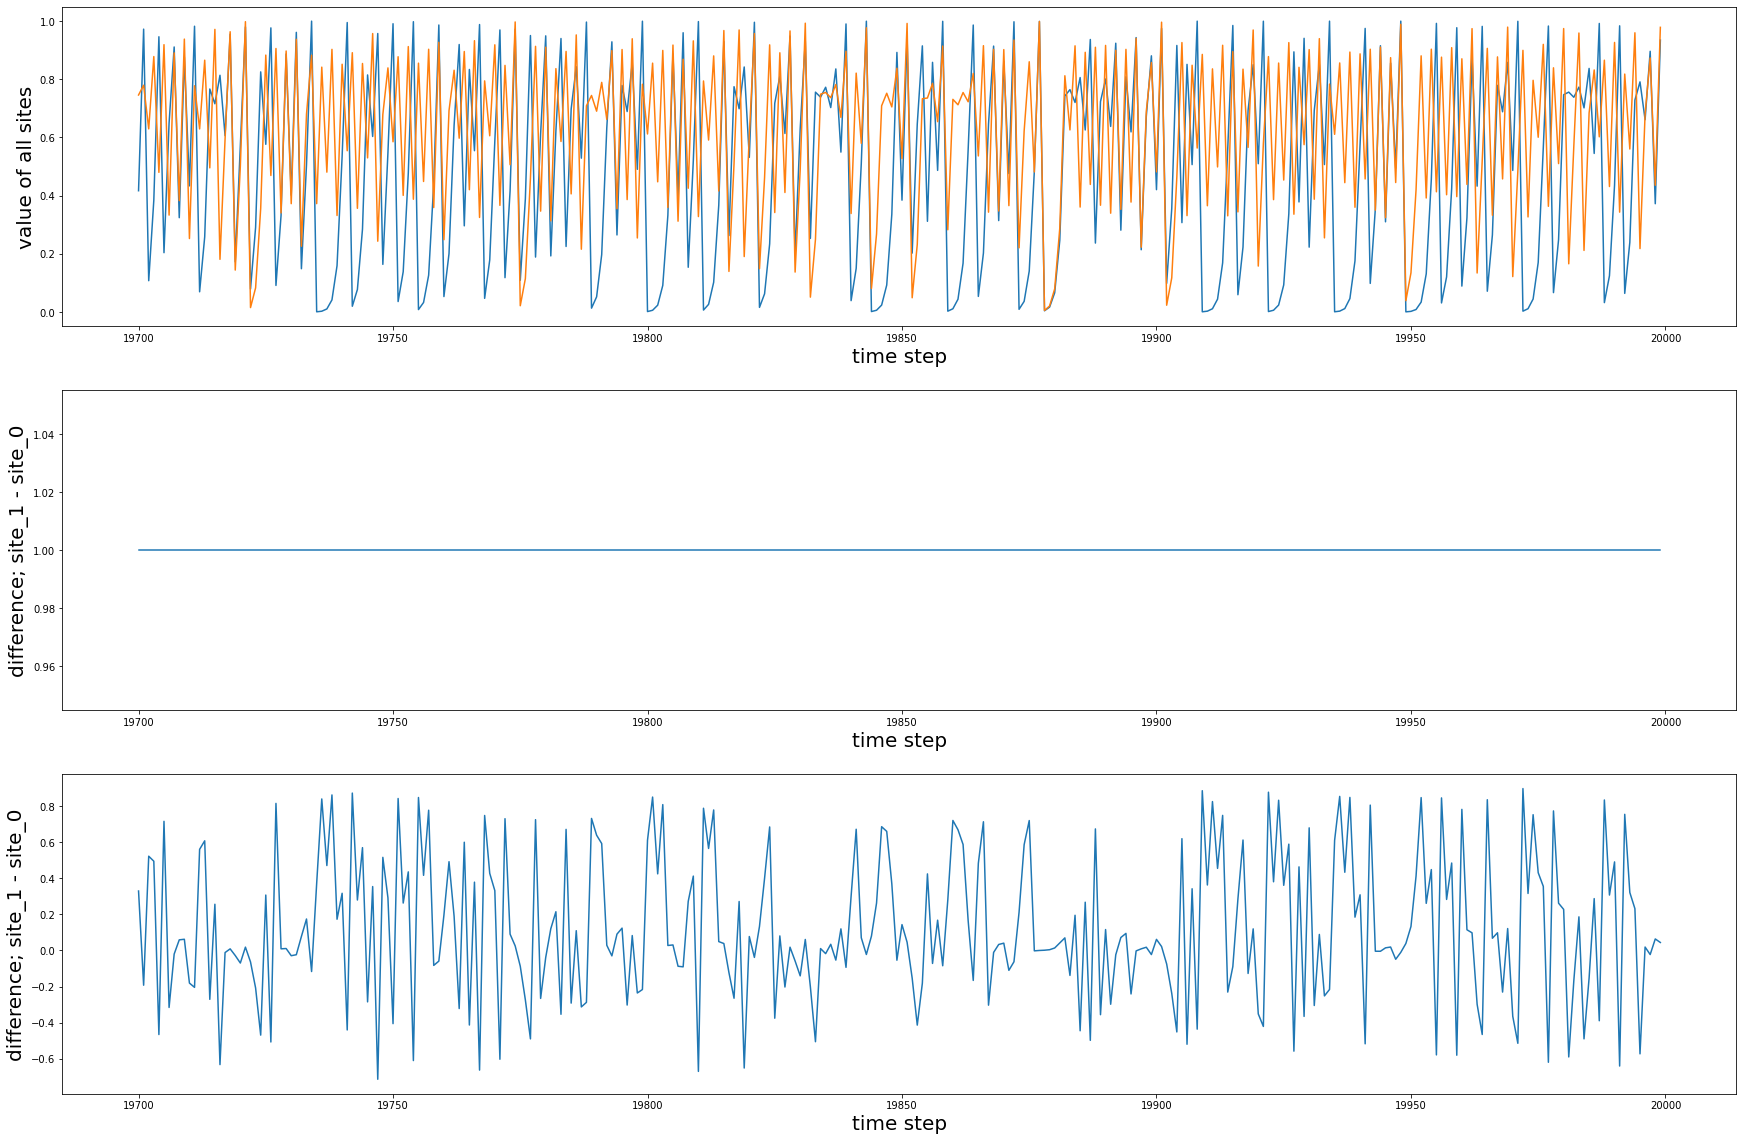

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt


L = 2      # no. of lattice sites
eps = 0.1  # diffusive coupling strength: 
r = 4   # control parameter r:

#np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 200   # The iterates we'll throw away
nSteps = 20000       # The iterates we use

def logistic(r, x):
  return r*x*(1-x)

def next_x(f, x, r=r, p=eps, L=2):
  x_new = np.empty(x.shape)
  x_new[0] = f(r,x[0])
  x_new[1] = (1 - p) * f(r,x[1]) + p*f(r,x[0])
  return x_new
#縦 site, 横 time(step)
states = np.empty((nSteps, L))

for i in range(nTransients):
  ic=next_x(logistic, ic)

states[0]=ic
for i in range(nSteps-1):
  states[i+1]=next_x(logistic, states[i])

print(states.shape)
plt.rcParams["figure.figsize"] = (30, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(3,1)
ax1[0].set_xlabel("time step",fontsize=20)
ax1[0].set_ylabel("value of all sites",fontsize=20)  

plot_length=300
time=np.arange(nSteps)
ax1[0].plot(time[-plot_length:], states[-plot_length:])

ax1[1].set_xlabel("time step",fontsize=20)
ax1[1].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[1].plot(time[-plot_length:], (abs(states[-plot_length:,1]-states[-plot_length:,0])>1e-4))

ax1[2].set_xlabel("time step",fontsize=20)
ax1[2].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[2].plot(time[-plot_length:], (states[-plot_length:,1]-states[-plot_length:,0]))
plt.show()

# 一方向入力, 一つの状態はランダム値で入力となる.

## 分岐図 パラメータごとで入力は共通 

よって横のつながりがある.

p_shape = (4000,)
x_shape = (4000, 200)


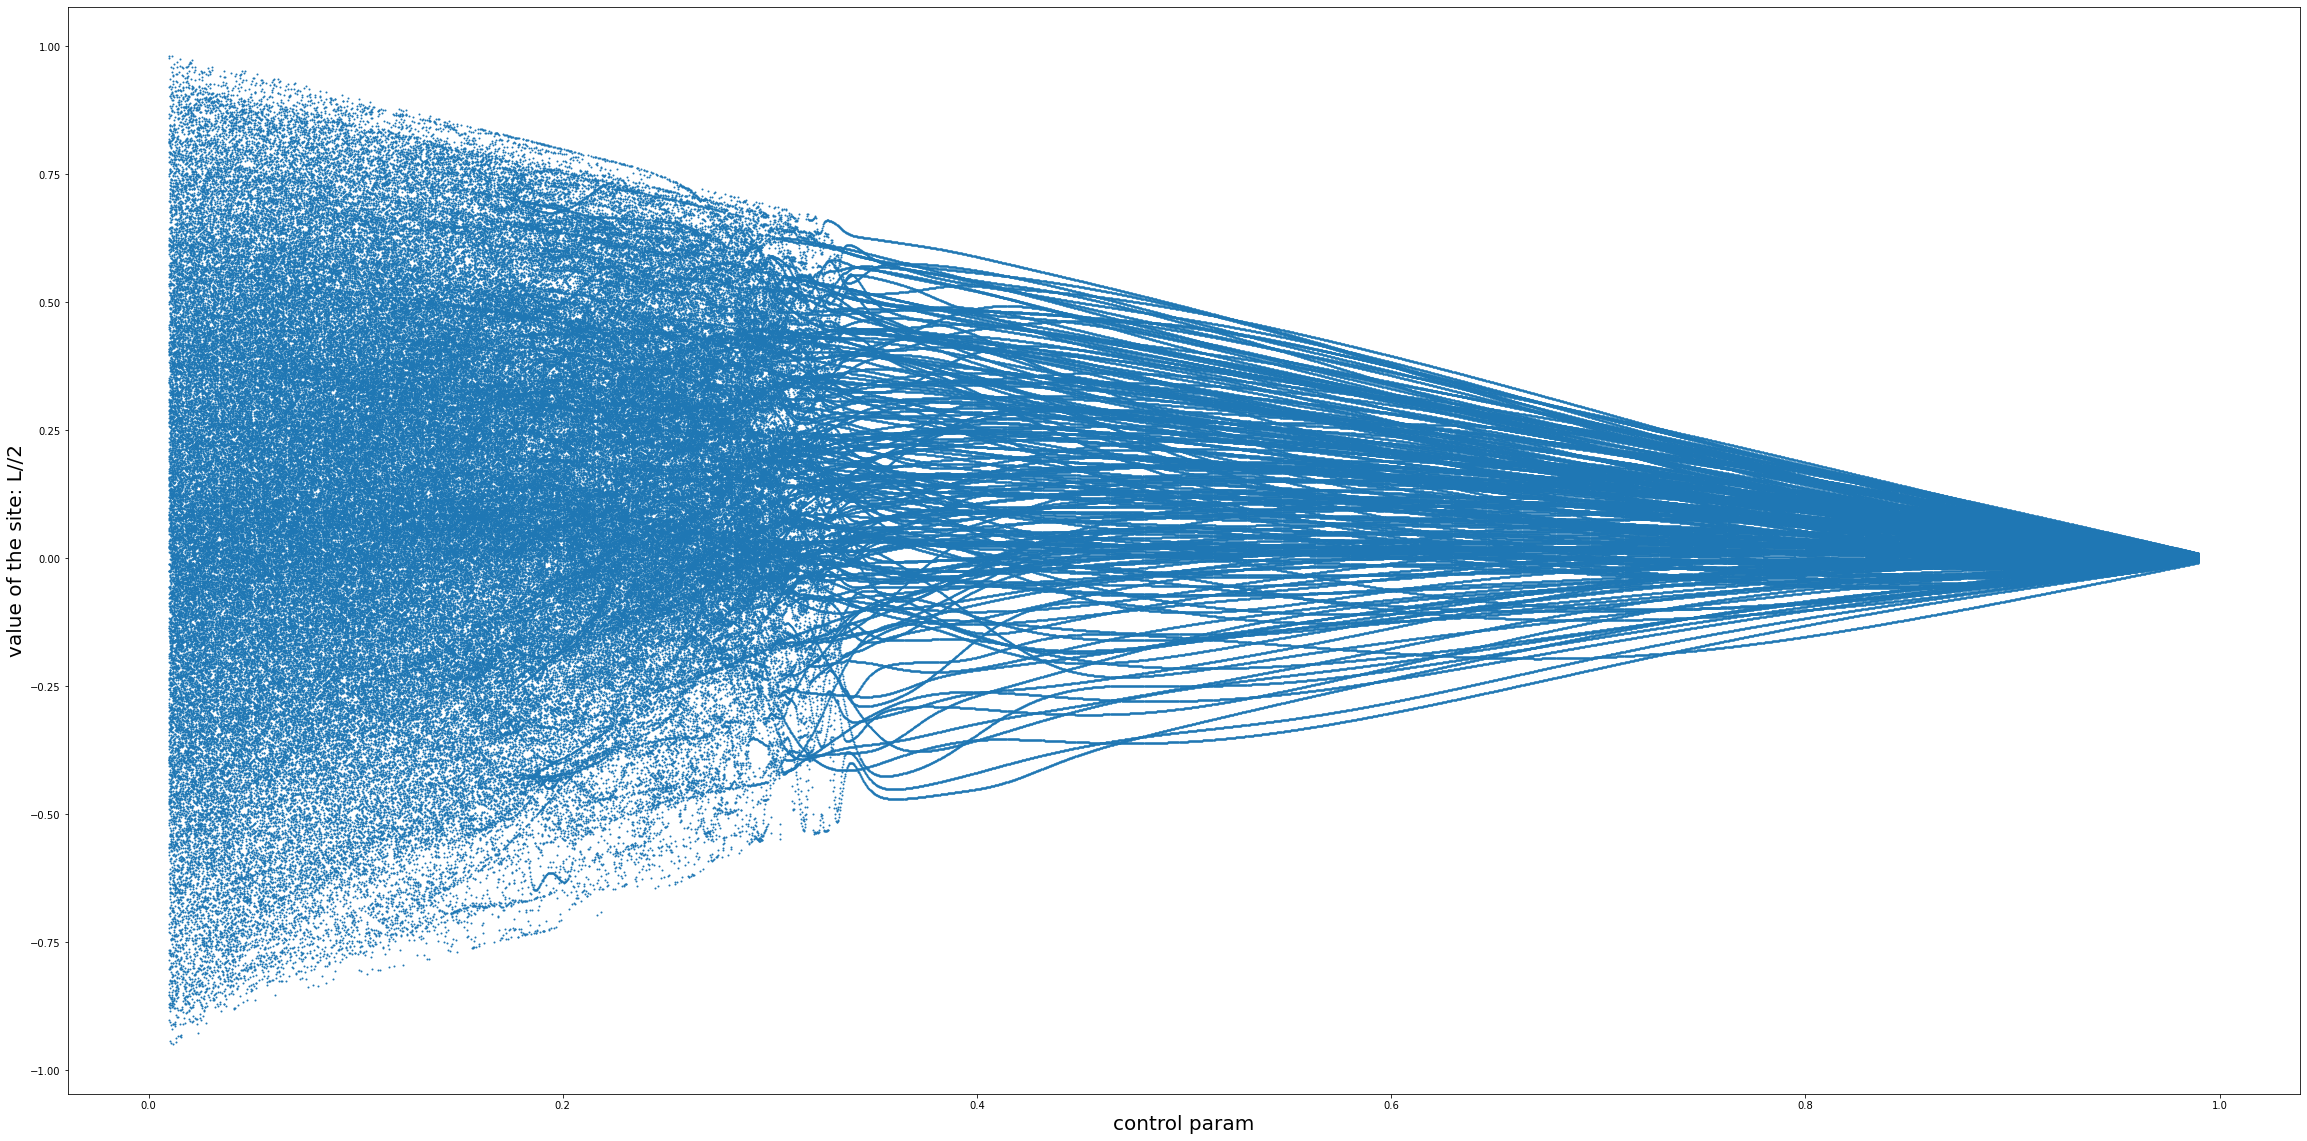

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import math

L = 2      # no. of lattice sites

#np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 4000   # The iterates we'll throw away
nIterates=200
nSteps = 4000       # This sets how dense the bifurcation diagram will be

pLow = 0.01
pHigh = 0.99
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

"""
端を0の固定端とする。
左右対称じゃないのは初期値が原因.

np.newaxisの正確な説明:
https://qiita.com/tomoshi0809/items/a5ed38ad8db030650e7f

"""
def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] =  np.random.rand()
        elif i == L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + p*x_new[i-1]
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + 0.5 * p * (f(p,x[i-1]) + f(4,x[i+1]))
            #ここの0.5は必要か??
    return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(func1, L, states)

x = np.empty((p.size, nIterates))
for i in range(nIterates):
  states=next_x(func1, L,  states)
  x[:,i]=states[1]-states[0]

plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("value of the site: L//2",fontsize=20)  

time=np.arange(nSteps)
#表示はできたけど　勝手に系列推測される,,,
#ax1.plot(p, x, linestyle = "solid")
ax1.scatter(np.tile(p[:,None], (1, nIterates)), x, s=1)
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


## 分岐図 パラメータごとで入力を変更. 

よって横のつながりがある.

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import math

L = 2      # no. of lattice sites

#np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 4000   # The iterates we'll throw away
nIterates=200
nSteps = 4000       # This sets how dense the bifurcation diagram will be

pLow = 0.01
pHigh = 0.99
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

def logistic(r, x):
  return r*x*(1-x)
"""
np.random.rand() について

pythonの乱数:
https://qiita.com/naka-j/items/843e6bf8cb9761f5f5f1

"""
def next_x(f, x, L=2):
  x_new = np.empty(x.shape)
  x_new[0] =  np.random.rand(x.shape[1])
  x_new[1] = (1 - p) * f(4,x[1]) + p*x_new[0]
  return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(logistic, states)

x = np.empty((p.size, nIterates))
for i in range(nIterates):
  states=next_x(logistic, states)
  x[:,i]=states[1]-states[0]

plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("value of the site: L//2",fontsize=20)  

time=np.arange(nSteps)
ax1.scatter(np.tile(p[:,None], (1, nIterates)), x, s=1)
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


Output hidden; open in https://colab.research.google.com to view.

## frequency

p_shape = (20000,)
x_shape = (20000, 1000)


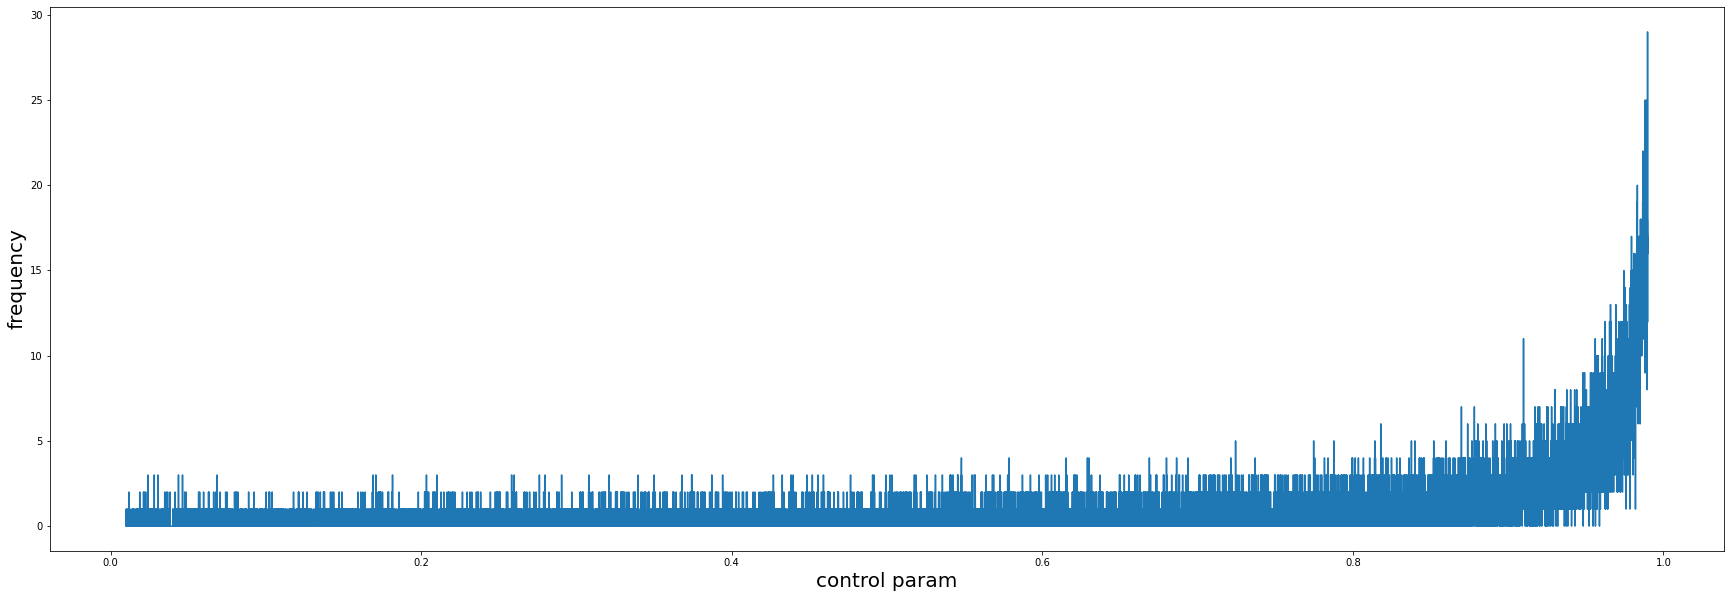

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

L = 2      # no. of lattice sites

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 10001   # The iterates we'll throw away
nIterates=1000
nSteps = 20000      # This sets how dense the bifurcation diagram will be

pLow = 0.01
pHigh = 0.99
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

def logistic(r, x):
  return r*x*(1-x)

def next_x(f, x, L=2):
  x_new = np.empty(x.shape)
  x_new[0] =  np.random.rand(x.shape[1])
  x_new[1] = (1 - p) * f(4,x[1]) + p*x_new[0]
  return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(logistic, states)

delta=0.0001
x = np.empty((p.size, nIterates))
for j in range(p.size):
    x[j,0]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0

count=np.zeros((p.size,1))
for i in range(1, nIterates):
  states=next_x(logistic, states)
  for j in range(p.size):
    x[j,i]=1 if abs(((states[1]-states[0]).T)[j])<delta else 0
    count[j, 0]+=1 if x[j, i]!=x[j, i-1] else 0

count=count.reshape(p.size)//2

plt.rcParams["figure.figsize"] = (30, 10)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("frequency",fontsize=20)  

ax1.plot(p, count, linestyle = "solid")
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


## 二つの状態値, その差

(20000, 2)


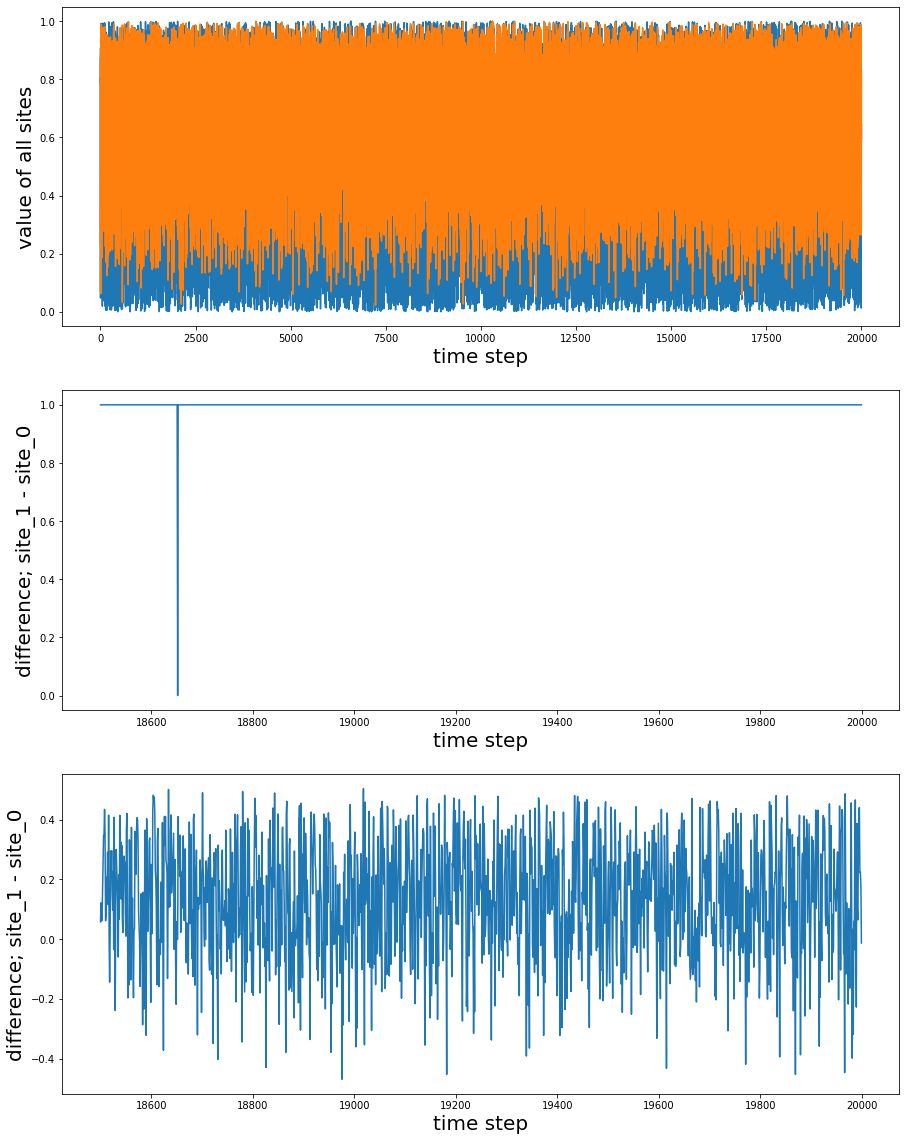

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt


L = 2      # no. of lattice sites
eps = 0.49  # diffusive coupling strength: 
r = 4   # control parameter r:

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 200   # The iterates we'll throw away
nSteps = 20000       # The iterates we use

def logistic(r, x):
  return r*x*(1-x)

def next_x(f, x, p=eps, L=2):
  x_new = np.empty(x.shape)
  x_new[0] =  np.random.rand()
  x_new[1] = (1 - p) * f(4,x[1]) + p*x_new[0]
  return x_new
#縦 site, 横 time(step)
states = np.empty((nSteps, L))

for i in range(nTransients):
  ic=next_x(logistic, ic)

states[0]=ic
for i in range(nSteps-1):
  states[i+1]=next_x(logistic, states[i])

print(states.shape)
plt.rcParams["figure.figsize"] = (15, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(3,1)
ax1[0].set_xlabel("time step",fontsize=20)
ax1[0].set_ylabel("value of all sites",fontsize=20)  

time=np.arange(nSteps)
ax1[0].plot(time, states)

plot_length=1500
ax1[1].set_xlabel("time step",fontsize=20)
ax1[1].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[1].plot(time[-plot_length:], (abs(states[-plot_length:,1]-states[-plot_length:,0])>1e-4))

ax1[2].set_xlabel("time step",fontsize=20)
ax1[2].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[2].plot(time[-plot_length:], (states[-plot_length:,1]-states[-plot_length:,0]))
plt.show()